In [1]:
# import analytics tool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import ML tools
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [3]:
# import card data
cards_df = pd.read_csv('data_files/cards.csv')
cards_df.head(5)

/var/folders/tm/jmhp8xvj4_d4hh_01cf1jt_r0000gn/T/ipykernel_36284/2970704901.py:2: DtypeWarning: Columns (3,7,12,16,20,23,25,26,30,31,32,33,35,39,40,41,47,52,53,61,62,66,68) have mixed types. Specify dtype option on import or set low_memory=False.
  cards_df = pd.read_csv('data_files/cards.csv')


,artist,artistIds,asciiName,attractionLights,availability,boosterTypes,borderColor,cardParts,colorIdentity,colorIndicator,...,subsets,subtypes,supertypes,text,toughness,type,types,uuid,variations,watermark
0,Pete Venters,d54c4a1a-c0c5-4834-84db-125d341f3ad8,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,b7c19924-b4bf-56fc-aa73-f586e940bd42,NaN
1,Pete Venters,d54c4a1a-c0c5-4834-84db-125d341f3ad8,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,NaN
2,Volkan Baǵa,93bec3c0-0260-4d31-8064-5d01efb4153f,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,NaN
3,Volkan Baǵa,93bec3c0-0260-4d31-8064-5d01efb4153f,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,NaN
4,Mark Zug,48e2b98c-5467-4671-bd42-4c3746115117,NaN,NaN,"mtgo, paper",default,black,NaN,W,NaN,...,NaN,NaN,NaN,Target creature gets +3/+3 and gains flying un...,NaN,Sorcery,Sorcery,55bd38ca-dc73-5c06-8f80-a6ddd2f44382,c5655330-5131-5f40-9d3e-0549d88c6e9e,NaN


In [4]:
# list all columns
cards_df.columns.to_list()

['artist',
 'artistIds',
 'asciiName',
 'attractionLights',
 'availability',
 'boosterTypes',
 'borderColor',
 'cardParts',
 'colorIdentity',
 'colorIndicator',
 'colors',
 'defense',
 'duelDeck',
 'edhrecRank',
 'edhrecSaltiness',
 'faceConvertedManaCost',
 'faceFlavorName',
 'faceManaValue',
 'faceName',
 'finishes',
 'flavorName',
 'flavorText',
 'frameEffects',
 'frameVersion',
 'hand',
 'hasAlternativeDeckLimit',
 'hasContentWarning',
 'hasFoil',
 'hasNonFoil',
 'isAlternative',
 'isFullArt',
 'isFunny',
 'isOnlineOnly',
 'isOversized',
 'isPromo',
 'isRebalanced',
 'isReprint',
 'isReserved',
 'isStarter',
 'isStorySpotlight',
 'isTextless',
 'isTimeshifted',
 'keywords',
 'language',
 'layout',
 'leadershipSkills',
 'life',
 'loyalty',
 'manaCost',
 'manaValue',
 'name',
 'number',
 'originalPrintings',
 'originalReleaseDate',
 'originalText',
 'originalType',
 'otherFaceIds',
 'power',
 'printings',
 'promoTypes',
 'rarity',
 'rebalancedPrintings',
 'relatedCards',
 'securitySt

In [5]:
# Trim down the columns 
cards_df = cards_df[['name', 'types', 'colors','power',
          'toughness', 'manaCost','manaValue', 'rarity',  'setCode', 'uuid', 'isReprint']]

In [6]:
# import price data
price_df = pd.read_csv('data_files/cardPrices.csv')
price_df.head(5)

,cardFinish,currency,date,gameAvailability,price,priceProvider,providerListing,uuid
0,normal,USD,2023-10-22,mtgo,0.07,cardhoarder,retail,f182e364-0439-5594-a6e6-75f7889ccf45
1,normal,USD,2023-10-22,mtgo,0.23,cardhoarder,retail,330deaa3-dd7a-52a8-bfbc-b323cd16a409
2,normal,USD,2023-10-22,mtgo,0.02,cardhoarder,retail,79e36956-b91f-580f-8309-7d9585a67560
3,normal,USD,2023-10-22,mtgo,0.15,cardhoarder,retail,6afb2b4c-530a-57d5-8e7f-871239f6fa05
4,normal,USD,2023-10-22,mtgo,0.02,cardhoarder,retail,b1fc2762-92aa-5a14-8509-a59cb611e376


In [7]:
price_df.columns.to_list()

['cardFinish',
 'currency',
 'date',
 'gameAvailability',
 'price',
 'priceProvider',
 'providerListing',
 'uuid']

In [8]:
price_df[['price', 'priceProvider', 'uuid']]

,price,priceProvider,uuid
0,0.07,cardhoarder,f182e364-0439-5594-a6e6-75f7889ccf45
1,0.23,cardhoarder,330deaa3-dd7a-52a8-bfbc-b323cd16a409
2,0.02,cardhoarder,79e36956-b91f-580f-8309-7d9585a67560
3,0.15,cardhoarder,6afb2b4c-530a-57d5-8e7f-871239f6fa05
4,0.02,cardhoarder,b1fc2762-92aa-5a14-8509-a59cb611e376
...,...,...,...
647535,650.07,cardsphere,172a10dc-1b3d-5d24-b312-89fe2387a81e
647536,33.99,cardsphere,c04b97ec-5f88-5709-992b-486303835d3d
647537,5.56,cardsphere,a0400e83-f5b3-5353-ba4b-23faad67e4db
647538,9.78,cardsphere,5726ee7a-7b47-5735-8c75-7a5d4d68df1d


In [9]:
# Import set data
set_df = pd.read_csv('data_files/sets.csv')
set_df.head(5)

,baseSetSize,block,cardsphereSetId,code,isFoilOnly,isForeignOnly,isNonFoilOnly,isOnlineOnly,isPartialPreview,keyruneCode,...,mcmIdExtras,mcmName,mtgoCode,name,parentCode,releaseDate,tcgplayerGroupId,tokenSetCode,totalSetSize,type
0,383,Core Set,755.0,10E,False,NaN,NaN,False,NaN,10E,...,NaN,Tenth Edition,10E,Tenth Edition,NaN,2007-07-13,1.0,T10E,510,core
1,302,Core Set,938.0,2ED,False,NaN,True,False,NaN,2ED,...,NaN,NaN,NaN,Unlimited Edition,NaN,1993-12-01,115.0,NaN,302,core
2,577,NaN,1462.0,2X2,False,NaN,NaN,False,NaN,2X2,...,5071.0,Double Masters 2022,NaN,Double Masters 2022,NaN,2022-07-08,3070.0,T2X2,579,masters
3,332,NaN,1251.0,2XM,False,NaN,NaN,False,NaN,2XM,...,3209.0,Double Masters,2XM,Double Masters,NaN,2020-08-07,2655.0,T2XM,384,masters
4,594,NaN,NaN,30A,False,NaN,True,False,NaN,30A,...,NaN,30th Anniversary Edition,NaN,30th Anniversary Edition,NaN,2022-11-28,3178.0,T30A,594,memorabilia


In [10]:
# List all columns
set_df.columns.to_list()

['baseSetSize',
 'block',
 'cardsphereSetId',
 'code',
 'isFoilOnly',
 'isForeignOnly',
 'isNonFoilOnly',
 'isOnlineOnly',
 'isPartialPreview',
 'keyruneCode',
 'languages',
 'mcmId',
 'mcmIdExtras',
 'mcmName',
 'mtgoCode',
 'name',
 'parentCode',
 'releaseDate',
 'tcgplayerGroupId',
 'tokenSetCode',
 'totalSetSize',
 'type']

In [11]:
set_df[['code', 'releaseDate']]

,code,releaseDate
0,10E,2007-07-13
1,2ED,1993-12-01
2,2X2,2022-07-08
3,2XM,2020-08-07
4,30A,2022-11-28
...,...,...
718,YWOE,2023-10-10
719,ZEN,2009-10-02
720,ZNC,2020-09-25
721,ZNE,2020-09-25


## Clean Data

In [12]:
# List set codes to find the standard legal cards I want to analyze
cards_df['setCode'].unique().tolist()

['10E',
 '2ED',
 '2X2',
 '2XM',
 '30A',
 '3ED',
 '40K',
 '4BB',
 '4ED',
 '5DN',
 '5ED',
 '6ED',
 '7ED',
 '8ED',
 '9ED',
 'A25',
 'AER',
 'AFC',
 'AFR',
 'AJMP',
 'AKH',
 'AKR',
 'ALA',
 'ALL',
 'ANA',
 'ANB',
 'APC',
 'ARB',
 'ARC',
 'ARN',
 'ATH',
 'ATQ',
 'AVR',
 'BBD',
 'BCHR',
 'BFZ',
 'BNG',
 'BOK',
 'BOT',
 'BRB',
 'BRC',
 'BRO',
 'BRR',
 'BTD',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'CC1',
 'CC2',
 'CED',
 'CEI',
 'CHK',
 'CHR',
 'CLB',
 'CM1',
 'CM2',
 'CMA',
 'CMB1',
 'CMB2',
 'CMD',
 'CMM',
 'CMR',
 'CN2',
 'CNS',
 'CON',
 'CP1',
 'CP2',
 'CP3',
 'CSP',
 'CST',
 'DBL',
 'DD1',
 'DD2',
 'DDC',
 'DDD',
 'DDE',
 'DDF',
 'DDG',
 'DDH',
 'DDI',
 'DDJ',
 'DDK',
 'DDL',
 'DDM',
 'DDN',
 'DDO',
 'DDP',
 'DDQ',
 'DDR',
 'DDS',
 'DDT',
 'DDU',
 'DGM',
 'DIS',
 'DKA',
 'DKM',
 'DMC',
 'DMR',
 'DMU',
 'DOM',
 'DPA',
 'DRB',
 'DRK',
 'DST',
 'DTK',
 'DVD',
 'E01',
 'E02',
 'EA1',
 'EA2',
 'EA3',
 'ELD',
 'EMA',
 'EMN',
 'EVE',
 'EVG',
 'EXO',
 'EXP',
 'F0

In [13]:
# Dataframe that shows most of all standard legal cards
standard_legal = ['MID','VOW','NEO','SNC', 'DMU', 'BRO','MOM','MAT','WOE']
standard_cards_df = cards_df[cards_df['setCode'].isin(standard_legal)]
standard_cards_df.head(5)

,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid,isReprint
12032,Aeronaut Cavalry,Creature,W,3,4,{4}{W},5.0,common,BRO,6ff98307-b89c-5a43-bc3c-3f81d803617d,NaN
12033,Airlift Chaplain,Creature,W,1,1,{2}{W},3.0,common,BRO,e4d66ec1-7ba2-5c80-a9c1-e33500cfdbb5,NaN
12034,Ambush Paratrooper,Creature,W,1,2,{1}{W},2.0,common,BRO,8d065ec5-4e7f-50f6-92c8-277673a6fb19,NaN
12035,Calamity's Wake,Instant,W,NaN,NaN,{1}{W},2.0,uncommon,BRO,45e16536-c429-54c9-906e-43b9f9ee83b2,NaN
12036,Deadly Riposte,Instant,W,NaN,NaN,{1}{W},2.0,common,BRO,d184bcd7-1c35-558f-8fd4-c2065a349018,NaN


In [14]:
# Cards in MID with duplicates dropped via names
mom_cards = standard_cards_df[standard_cards_df['setCode'] == 'MOM']
mom_cards = mom_cards.drop_duplicates(subset='name', keep='first')
mom_cards.head(5)

,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid,isReprint
49088,Invasion of Ravnica // Guildpact Paragon,Battle,NaN,NaN,NaN,{5},5.0,mythic,MOM,dff87229-6257-5fe4-907e-694ad4f8974e,NaN
49090,Aerial Boost,Instant,W,NaN,NaN,{1}{W},2.0,common,MOM,eeacede0-193a-53ec-b9c6-ec616b960c2a,NaN
49091,Alabaster Host Intercessor,Creature,W,3,4,{5}{W},6.0,common,MOM,79bc98eb-7179-58d4-b472-4bbdc438ffa9,NaN
49092,Alabaster Host Sanctifier,Creature,W,2,2,{1}{W},2.0,common,MOM,b1334ce9-0115-51bc-bc46-c1303be41f84,NaN
49093,Angelic Intervention,Instant,W,NaN,NaN,{1}{W},2.0,common,MOM,3769fbfe-178d-5ac1-ac29-ba0f3d97bf60,NaN


## Dataframe Including All Standard Legal Cards

In [15]:
# Using a for loop to drop all duplicates in all standard legal sets

# Legal Sets
standard_legal = ['MID', 'VOW', 'NEO', 'SNC', 'DMU', 'BRO', 'MOM', 'MAT', 'WOE']

# Empty Data Frame
standard_cards_df = pd.DataFrame()

#For lopp to ad all the data into empty data frame
for set_code in standard_legal:
    set_cards = cards_df[cards_df['setCode'] == set_code]
    set_cards_unique = set_cards.drop_duplicates(subset='name', keep='first')
    standard_cards_df = pd.concat([standard_cards_df, set_cards_unique], ignore_index=True)

standard_cards_df.head(5)

,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid,isReprint
0,"Adeline, Resplendent Cathar",Creature,W,*,4,{1}{W}{W},3.0,rare,MID,f10c65cc-1a64-552e-b53c-f825ca89d5eb,NaN
1,Ambitious Farmhand // Seasoned Cathar,Creature,W,1,1,{1}{W},2.0,uncommon,MID,cf968d16-027f-5970-a3a3-cb2f49e8dca0,NaN
2,Beloved Beggar // Generous Soul,Creature,W,0,4,{1}{W},2.0,uncommon,MID,13d054c7-4c25-5425-8b39-01fed17ebca1,NaN
3,Bereaved Survivor // Dauntless Avenger,Creature,W,2,1,{2}{W},3.0,uncommon,MID,295b974a-b0ee-59f3-829e-6f9912c9c9b7,NaN
4,Blessed Defiance,Instant,W,NaN,NaN,{W},1.0,common,MID,87f85d5d-834c-589d-9738-1983bba0ded8,NaN


In [16]:
# Check for cards that are not legal in standard. Aftermath has mutliverse legends which are not standard legal
mat_cards = standard_cards_df.loc[standard_cards_df['setCode'] == 'MAT', 'name'].unique()
mat_cards = pd.Series(mat_cards)
print(f'Number of unique card in MAT is {mat_cards.count()}.')

Number of unique card in MAT is 50.


#### Create a Banned list to be removed from the data set

In [17]:
# Remove all banned cards from
standard_ban_list = ['The Meathook Massacre',
'Fable of the Mirror-Breaker//Reflection of Kiki-Jiki',
'Invoke Despair',
'Reckoner Bankbuster']
banned_cards = standard_cards_df[standard_cards_df['name'].isin(standard_ban_list)]
banned_cards

,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid,isReprint
117,The Meathook Massacre,Enchantment,B,NaN,NaN,{X}{B}{B},2.0,mythic,MID,c918b5d5-48c1-50b1-a924-3babf7992b57,NaN
671,Invoke Despair,Sorcery,B,NaN,NaN,{1}{B}{B}{B}{B},5.0,rare,NEO,c9f820b9-5b00-527f-8f9f-2bf9ad89a8bd,NaN
834,Reckoner Bankbuster,Artifact,NaN,4,4,{2},2.0,rare,NEO,55b5864a-8d81-55b5-bfd6-c927e0c380d7,NaN


This did not give me all the cards I wanted to ban Fable of the Mirror-Breaker//Reflection of Kiki-Jiki was missing from the list

In [18]:
# Find Fable of the Mirror-Breaker
fable_card = standard_cards_df[standard_cards_df['name'].str.contains('Fable')]
fable_card

,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid,isReprint
714,Fable of the Mirror-Breaker // Reflection of K...,Enchantment,R,NaN,NaN,{2}{R},3.0,rare,NEO,e54871ca-b187-5a71-b8eb-9e9c5322f4a4,NaN


In [19]:
# Final df that shows all banned cards
banned_cards = pd.concat([banned_cards, fable_card], ignore_index=True).drop_duplicates()
banned_cards

,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid,isReprint
0,The Meathook Massacre,Enchantment,B,NaN,NaN,{X}{B}{B},2.0,mythic,MID,c918b5d5-48c1-50b1-a924-3babf7992b57,NaN
1,Invoke Despair,Sorcery,B,NaN,NaN,{1}{B}{B}{B}{B},5.0,rare,NEO,c9f820b9-5b00-527f-8f9f-2bf9ad89a8bd,NaN
2,Reckoner Bankbuster,Artifact,NaN,4,4,{2},2.0,rare,NEO,55b5864a-8d81-55b5-bfd6-c927e0c380d7,NaN
3,Fable of the Mirror-Breaker // Reflection of K...,Enchantment,R,NaN,NaN,{2}{R},3.0,rare,NEO,e54871ca-b187-5a71-b8eb-9e9c5322f4a4,NaN


In [20]:
standard_legal_df = pd.concat([standard_cards_df, banned_cards]).drop_duplicates(keep=False)
standard_legal_df.head(5)

,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid,isReprint
0,"Adeline, Resplendent Cathar",Creature,W,*,4,{1}{W}{W},3.0,rare,MID,f10c65cc-1a64-552e-b53c-f825ca89d5eb,NaN
1,Ambitious Farmhand // Seasoned Cathar,Creature,W,1,1,{1}{W},2.0,uncommon,MID,cf968d16-027f-5970-a3a3-cb2f49e8dca0,NaN
2,Beloved Beggar // Generous Soul,Creature,W,0,4,{1}{W},2.0,uncommon,MID,13d054c7-4c25-5425-8b39-01fed17ebca1,NaN
3,Bereaved Survivor // Dauntless Avenger,Creature,W,2,1,{2}{W},3.0,uncommon,MID,295b974a-b0ee-59f3-829e-6f9912c9c9b7,NaN
4,Blessed Defiance,Instant,W,NaN,NaN,{W},1.0,common,MID,87f85d5d-834c-589d-9738-1983bba0ded8,NaN


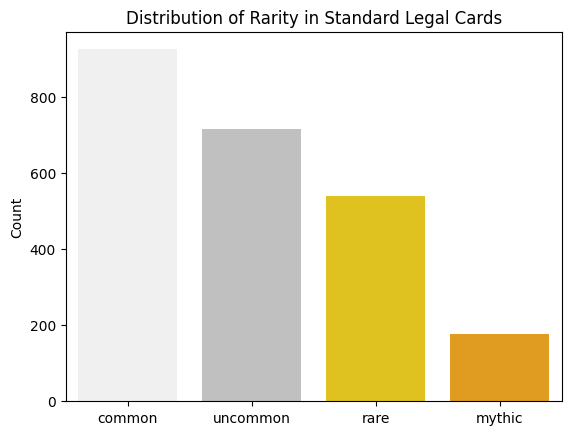

In [21]:
# Count of Rarities
custom_palette = {
    'common': '#F0F0F0',
    'uncommon': 'silver',
    'mythic': 'orange',
    'rare': 'gold'
}

rarity_counts =standard_legal_df['rarity'].value_counts()

sns.barplot(x=rarity_counts.index, y=rarity_counts.values, palette=custom_palette)
plt.ylabel('Count')
plt.title('Distribution of Rarity in Standard Legal Cards')
plt.show()

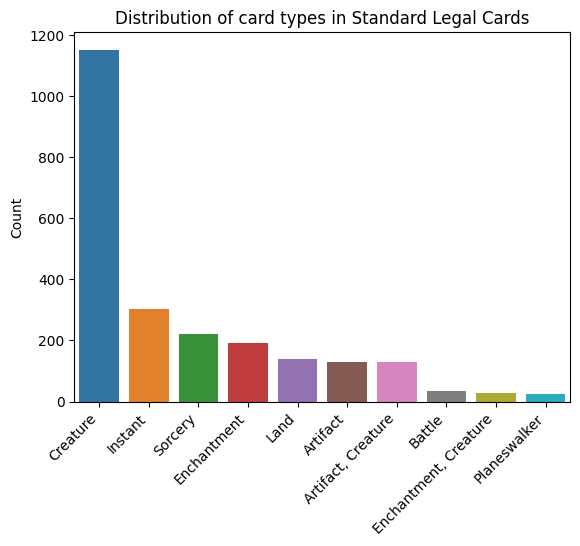

In [23]:
# Count of card types

type_counts = standard_legal_df['types'].value_counts()

sns.barplot(x=type_counts.index, y=type_counts.values)
plt.ylabel('Count')
plt.title('Distribution of card types in Standard Legal Cards')
plt.xticks(rotation=45, ha='right')
plt.show()

In [24]:
# Distirbution of Colors, nan color?
standard_legal_df['colors'].unique()

array(['W', 'U', 'B', 'R', 'G', 'R, W', 'R, U', 'G, R', 'B, U', 'B, W',
       'G, U', 'G, W', 'U, W', 'B, G', 'B, R', nan, 'R, U, W', 'B, R, W',
       'B, G, R, U, W', 'G, R, W', 'G, U, W', 'B, R, U', 'B, G, R',
       'B, U, W', 'G, R, U', 'B, G, W', 'B, G, U', 'U, R, G'],
      dtype=object)

In [25]:
# Nan color seems to be colorless cards and lands
null_color_df = standard_legal_df[standard_legal_df['colors'].isnull()]
null_color_df.head(5)

,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid,isReprint
259,The Celestus,Artifact,NaN,NaN,NaN,{3},3.0,rare,MID,bc06cbe5-e4ff-54d9-b504-a5c7b3333124,NaN
260,Crossroads Candleguide,"Artifact, Creature",NaN,3,4,{4},4.0,common,MID,141d1f58-946a-5630-bdf1-9df88e80010e,NaN
261,Jack-o'-Lantern,Artifact,NaN,NaN,NaN,{1},1.0,common,MID,41faef03-46c3-5383-91af-1441066834ed,NaN
262,Moonsilver Key,Artifact,NaN,NaN,NaN,{2},2.0,uncommon,MID,b6b5758c-a97a-5b69-bc76-acc21b8aaf08,NaN
263,Mystic Skull // Mystic Monstrosity,Artifact,NaN,NaN,NaN,{2},2.0,uncommon,MID,ea6f4366-b2b0-5bd8-ac96-497f5d728053,NaN


In [26]:
lands_df = standard_legal_df[standard_legal_df['types']=='Land'].copy()
lands_df.head(5)

,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid,isReprint
267,Deserted Beach,Land,NaN,NaN,NaN,NaN,0.0,rare,MID,351012c3-c774-5f06-8c0e-0f26017f011f,NaN
268,Evolving Wilds,Land,NaN,NaN,NaN,NaN,0.0,common,MID,ba05d48d-8b06-5598-8d61-971b6fa899ea,True
269,Field of Ruin,Land,NaN,NaN,NaN,NaN,0.0,uncommon,MID,9e79b341-6d00-55e0-be68-e6a748eadcbf,True
270,Haunted Ridge,Land,NaN,NaN,NaN,NaN,0.0,rare,MID,a014a45e-0f72-5ec4-bfd2-5afda91512ae,NaN
271,Hostile Hostel // Creeping Inn,Land,NaN,NaN,NaN,NaN,0.0,mythic,MID,f2aa39ee-e000-57d3-8e08-6db4b5114124,NaN


In [27]:
# Create a data frame for all colorless cards which are not lands
colorless_cards_df = pd.concat([null_color_df, lands_df]).drop_duplicates(keep=False)
colorless_cards_df.head(5)

,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid,isReprint
259,The Celestus,Artifact,NaN,NaN,NaN,{3},3.0,rare,MID,bc06cbe5-e4ff-54d9-b504-a5c7b3333124,NaN
260,Crossroads Candleguide,"Artifact, Creature",NaN,3,4,{4},4.0,common,MID,141d1f58-946a-5630-bdf1-9df88e80010e,NaN
261,Jack-o'-Lantern,Artifact,NaN,NaN,NaN,{1},1.0,common,MID,41faef03-46c3-5383-91af-1441066834ed,NaN
262,Moonsilver Key,Artifact,NaN,NaN,NaN,{2},2.0,uncommon,MID,b6b5758c-a97a-5b69-bc76-acc21b8aaf08,NaN
263,Mystic Skull // Mystic Monstrosity,Artifact,NaN,NaN,NaN,{2},2.0,uncommon,MID,ea6f4366-b2b0-5bd8-ac96-497f5d728053,NaN


In [28]:
# Give a color code to colorless cards
colorless_cards_df.loc[:, 'colors'] = 'C'
colorless_cards_df.head(5)

,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid,isReprint
259,The Celestus,Artifact,C,NaN,NaN,{3},3.0,rare,MID,bc06cbe5-e4ff-54d9-b504-a5c7b3333124,NaN
260,Crossroads Candleguide,"Artifact, Creature",C,3,4,{4},4.0,common,MID,141d1f58-946a-5630-bdf1-9df88e80010e,NaN
261,Jack-o'-Lantern,Artifact,C,NaN,NaN,{1},1.0,common,MID,41faef03-46c3-5383-91af-1441066834ed,NaN
262,Moonsilver Key,Artifact,C,NaN,NaN,{2},2.0,uncommon,MID,b6b5758c-a97a-5b69-bc76-acc21b8aaf08,NaN
263,Mystic Skull // Mystic Monstrosity,Artifact,C,NaN,NaN,{2},2.0,uncommon,MID,ea6f4366-b2b0-5bd8-ac96-497f5d728053,NaN


In [29]:
# Give lands a code for lands
lands_df.loc[:, 'colors'] = 'L'
lands_df.head(5)

,name,types,colors,power,toughness,manaCost,manaValue,rarity,setCode,uuid,isReprint
267,Deserted Beach,Land,L,NaN,NaN,NaN,0.0,rare,MID,351012c3-c774-5f06-8c0e-0f26017f011f,NaN
268,Evolving Wilds,Land,L,NaN,NaN,NaN,0.0,common,MID,ba05d48d-8b06-5598-8d61-971b6fa899ea,True
269,Field of Ruin,Land,L,NaN,NaN,NaN,0.0,uncommon,MID,9e79b341-6d00-55e0-be68-e6a748eadcbf,True
270,Haunted Ridge,Land,L,NaN,NaN,NaN,0.0,rare,MID,a014a45e-0f72-5ec4-bfd2-5afda91512ae,NaN
271,Hostile Hostel // Creeping Inn,Land,L,NaN,NaN,NaN,0.0,mythic,MID,f2aa39ee-e000-57d3-8e08-6db4b5114124,NaN
